<a href="https://colab.research.google.com/github/jay-kanakia/GenAI/blob/main/07_Pytorch_Project_GPU_ann_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d zalando-research/fashionmnist

Dataset URL: https://www.kaggle.com/datasets/zalando-research/fashionmnist
License(s): other
  0% 0.00/68.8M [00:00<?, ?B/s]
100% 68.8M/68.8M [00:00<00:00, 1.71GB/s]


In [5]:
!unzip fashionmnist.zip -d data/

Archive:  fashionmnist.zip
  inflating: data/fashion-mnist_test.csv  
  inflating: data/fashion-mnist_train.csv  
  inflating: data/t10k-images-idx3-ubyte  
  inflating: data/t10k-labels-idx1-ubyte  
  inflating: data/train-images-idx3-ubyte  
  inflating: data/train-labels-idx1-ubyte  


In [190]:
train_data=pd.read_csv(r'/content/data/fashion-mnist_train.csv')
test_data=pd.read_csv(r'/content/data/fashion-mnist_test.csv')

In [191]:
train_data.shape,test_data.shape

((60000, 785), (10000, 785))

In [192]:
train_data.sample(2)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
11699,6,0,0,0,0,2,2,0,0,7,...,74,113,121,2,0,0,0,0,0,0
26192,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [193]:
X_train=train_data.iloc[:,1:].values
X_test=test_data.iloc[:,1:].values

y_train=train_data.iloc[:,0].values
y_test=test_data.iloc[:,0].values

In [194]:
torch.cuda.is_available()

True

In [195]:
device=torch.device('cuda')

In [196]:
torch.manual_seed(42)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

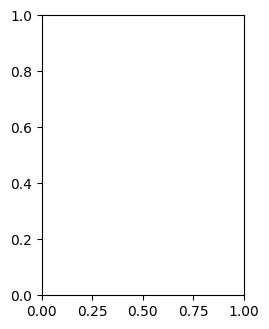

In [197]:
plt.figure(figsize=(12,8))
for i in range(1,9):
  plt.subplot(2,4,i)
  idx=np.random.randint(X_train.shape[0])
  img=X_train.iloc[idx,:].values.reshape(28,28)
  plt.title(f'Label :{y_train[idx]}')
  plt.imshow(img)
plt.show()


In [198]:
X_train=X_train/255
X_test=X_test/255

In [199]:
X_train_tensor=torch.from_numpy(X_train.astype(np.float32))
X_test_tensor=torch.from_numpy(X_test.astype(np.float32))

y_train_tensor=torch.from_numpy(y_train).long()
y_test_tensor=torch.from_numpy(y_test).long()

In [200]:
from torch.utils.data import Dataset,DataLoader

class MyDataset(Dataset):

  def __init__(self,features,labels):
    self.features=features
    self.labels=labels

  def __len__(self):
    return self.features.shape[0]

  def __getitem__(self,index):
    return self.features[index],self.labels[index]

In [201]:
train_dataset=MyDataset(X_train_tensor,y_train_tensor)
test_dataset=MyDataset(X_test_tensor,y_test_tensor)

In [202]:
train_loader=DataLoader(train_dataset,batch_size=256,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=256,shuffle=False)

In [203]:
import torch.nn as nn

class MyNN(nn.Module):

  def __init__(self,num_features):

    super().__init__()
    self.model=model=nn.Sequential(
    nn.Linear(num_features,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10)
    )

  def forward(self,X):
    return self.model(X)

In [204]:
model=MyNN(X_train_tensor.shape[1])
model=model.to(device)

In [205]:
epochs=100
learning_rate=0.1

loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

In [206]:
for epoch in range(epochs):
  total_loss=0
  for batch_features,batch_labels in train_loader:
    batch_features=batch_features.to(device)
    batch_labels=batch_labels.to(device)

    #forward
    y_pred=model(batch_features)

    #loss
    loss=loss_function(y_pred,batch_labels)

    #gradient to zero
    optimizer.zero_grad()

    #calculate gradient
    loss.backward()

    #update weights
    optimizer.step()

    total_loss += loss.item()

  avg_loss=total_loss/len(train_loader)
  print(f"epoch is {epoch+1} loss is {avg_loss}")

epoch is 1 loss is 1.0476655676009807
epoch is 2 loss is 0.5898170436950441
epoch is 3 loss is 0.5105096186729188
epoch is 4 loss is 0.4700376046464798
epoch is 5 loss is 0.4375293049406498
epoch is 6 loss is 0.4199117249630867
epoch is 7 loss is 0.40263145375759046
epoch is 8 loss is 0.3887733165253984
epoch is 9 loss is 0.37882640279353935
epoch is 10 loss is 0.3670555303071408
epoch is 11 loss is 0.35810348106191514
epoch is 12 loss is 0.3463843107223511
epoch is 13 loss is 0.3444882153196538
epoch is 14 loss is 0.3375822604970729
epoch is 15 loss is 0.32945843275557174
epoch is 16 loss is 0.3197627217845714
epoch is 17 loss is 0.3153373829227813
epoch is 18 loss is 0.30880474302362887
epoch is 19 loss is 0.3036633794612073
epoch is 20 loss is 0.2998614640946084
epoch is 21 loss is 0.29636753321962156
epoch is 22 loss is 0.2896351717253949
epoch is 23 loss is 0.2848425934289364
epoch is 24 loss is 0.28157693876865064
epoch is 25 loss is 0.27857618205090784
epoch is 26 loss is 0.2727

In [207]:
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [208]:
total=0
correct=0
with torch.no_grad():
  for batch_features,batch_labels in test_loader:
    batch_features=batch_features.to(device)
    batch_labels=batch_labels.to(device)

    y_pred=model(batch_features)
    y_pred=y_pred.argmax(dim=1)
    total=total+batch_labels.shape[0]
    correct=correct+(y_pred==batch_labels).sum().item()
  print(correct/total)

0.8142


In [209]:
total=0
correct=0
with torch.no_grad():
  for batch_features,batch_labels in train_loader:
    batch_features=batch_features.to(device)
    batch_labels=batch_labels.to(device)

    y_pred=model(batch_features)
    y_pred=y_pred.argmax(dim=1)
    total=total+batch_labels.shape[0]
    correct=correct+(y_pred==batch_labels).sum().item()
  print(correct/total)

0.8513166666666667
